## 特徴選択（フィルタ法）
---
- まずは相関係数を確認して，特徴を削除する方法を確認しよう

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 架空データの作成
中古住宅のデータ
- 目的変数
    * Price : 値段(百万円)
- 説明変数
    * AreaSize : 土地面積($\mathrm{m}^2$)
    * HouseSize : 家面積($\mathrm{m}^2$)
    * PassedYear : 経過年数(年)
    * Train : 電車での最寄り駅から主要駅までの所要時間(分)
    * Walk : 徒歩での最寄り駅から家までの所要時間(分)

In [2]:
df_house = pd.DataFrame({
        "Price":[24.8, 59.5, 7, 7.5, 9.8, 13.5, 14.9, 27, 27, 28, 28.5, 23, 12.9, 18, 23.7, 29.8, 17.8, 5.5, 8.7, 10.3, 14.5, 17.6, 16.8],
        "AreaSize":[98.4, 379.8, 58.6, 61.5, 99.6, 76.2, 115.7, 165.2, 215.2, 157.8, 212.9, 137.8, 87.2, 139.6, 172.6, 151.9, 179.5, 50, 105, 132, 174, 176, 168.7],
        "HouseSize":[74.2, 163.7, 50.5, 58, 66.4, 66.2, 59.6, 98.6, 87.4, 116.9, 96.9, 82.8, 75.1, 77.9, 125, 85.6, 70.1, 48.7, 66.5, 51.9, 82.3, 86.1, 80.8],
        "PassedYear":[4.8, 9.3, 13, 12.8, 14, 6, 14.7, 13.6, 13.3, 6.7, 3.1, 10.3, 11.6, 10.5, 3.8, 5.4, 4.5, 14.6, 13.7, 13, 10.3, 4.4, 12.8],
        "Train":[5, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 19, 23, 23, 23, 28, 32, 37, 37, 37, 37, 37, 41],
        "Walk":[6, 12, 2, 1, 5, 1, 4, 2, 7, 6, 5, 20, 8, 3, 5, 4, 2, 3, 11, 6, 18, 10, 2]
    })
df_house.index.name="id"
df_house

,AreaSize,HouseSize,PassedYear,Price,Train,Walk
id,,,,,,
0,98.4,74.2,4.8,24.8,5,6
1,379.8,163.7,9.3,59.5,12,12
2,58.6,50.5,13.0,7.0,16,2
3,61.5,58.0,12.8,7.5,16,1
4,99.6,66.4,14.0,9.8,16,5
5,76.2,66.2,6.0,13.5,16,1
6,115.7,59.6,14.7,14.9,16,4
7,165.2,98.6,13.6,27.0,16,2
8,215.2,87.4,13.3,27.0,16,7


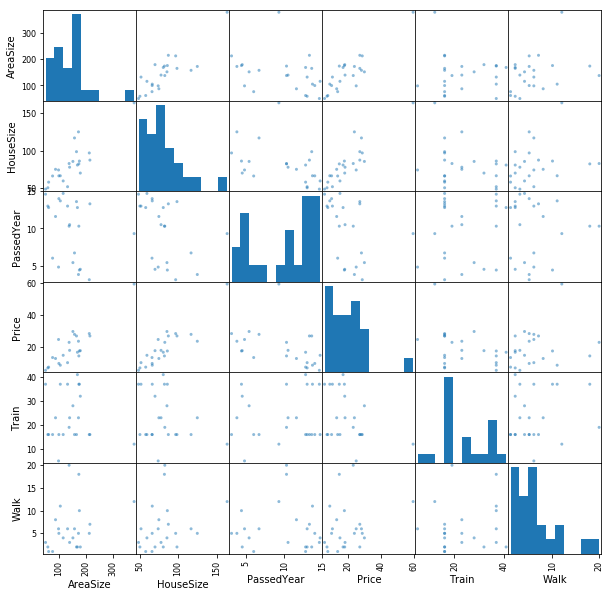

In [3]:
pd.plotting.scatter_matrix(df_house, figsize=(10,10))
plt.show()

In [4]:
# 説明変数の相関係数を確認
df_house[["AreaSize", "HouseSize", "PassedYear", "Train", "Walk"]].corr()

,AreaSize,HouseSize,PassedYear,Train,Walk
AreaSize,1.000000,0.843471,-0.303278,-0.074319,0.336687
HouseSize,0.843471,1.000000,-0.420226,-0.276636,0.291113
PassedYear,-0.303278,-0.420226,1.000000,0.124133,-0.020027
Train,-0.074319,-0.276636,0.124133,1.000000,0.138155
Walk,0.336687,0.291113,-0.020027,0.138155,1.000000


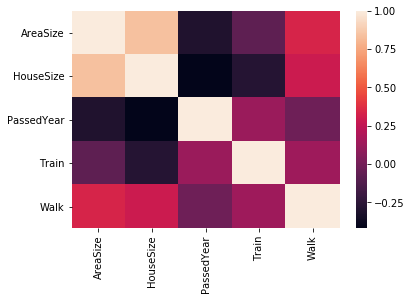

In [5]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_house[["AreaSize", "HouseSize", "PassedYear", "Train", "Walk"]].corr())
plt.show()

- 土地の面積"AreaSize"と家の面積"HouseSize"に強い正の相関
- この2つは似たような情報を示しているため、どちらか一方で良いだろう

In [6]:
# pandasのdrop関数を使って"AreaSize"を削除
# 列方向に削除するときは引数に特徴の名前とaxis=1を指定
df_house.drop("AreaSize", axis=1)

,HouseSize,PassedYear,Price,Train,Walk
id,,,,,
0,74.2,4.8,24.8,5,6
1,163.7,9.3,59.5,12,12
2,50.5,13.0,7.0,16,2
3,58.0,12.8,7.5,16,1
4,66.4,14.0,9.8,16,5
5,66.2,6.0,13.5,16,1
6,59.6,14.7,14.9,16,4
7,98.6,13.6,27.0,16,2
8,87.4,13.3,27.0,16,7
